# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy


# Feature Engenering

In [2]:
data = pd.read_excel("Solar practical data.xlsx", index_col=False)

data.columns
data.head()

AttributeError: 'ReadOnlyWorksheet' object has no attribute 'defined_names'

## Divding date into seperate

#### Jusitn

In [3]:
# fmt = '%Y-%m-%d %H:%M:%S'


# diff = np.datetime64(data.Date[1],  # -np.datetime64(data.Date[0])

#- datetime.timestamp(data.Date[0])

# print("diff= ", (diff))
# print(datetime.timestamp(data.Date[1]))


# data['difference'] = data['Time'].copy()


# for i in len(data-1):
#     data.iloc[i+1,-1] = data.iloc[i+1:,-2] - data.iloc[i:,-2]

# # (data.Date[2]-data.Date[1])

In [4]:
# data.Time[1]?

d1 = data.Date[0]
d2 = data.Date[1]


d2-d1

Timedelta('0 days 23:23:37')

### Work

In [5]:
data['DayName'] = data['Date'].dt.day_name()
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Time'] = data['Date'].dt.time


data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)


data = data[['Name','Date', 'Day' ,'Month', 'Time', 'Latitude', 'Longitude']]

In [6]:
sorted_Name = data.sort_values(by=['Name','Month', 'Day' ], ascending=True)
sorted_Name = sorted_Name.set_index('Name').reset_index()


# sorted_Name = data.sort_values(by=['Name','Day', 'Month'], ascending=True).set_index()
sorted_Name.head()

print(sorted_Name.to_latex(index=False,caption="test"))

\begin{table}
\centering
\caption{test}
\begin{tabular}{llrrlrr}
\toprule
  Name &                Date &  Day &  Month &     Time &  Latitude &  Longitude \\
\midrule
AR3074 & 2022-08-15 11:07:36 &   15 &      8 & 11:07:36 &     -16.0 &      125.0 \\
AR3074 & 2022-08-16 10:56:56 &   16 &      8 & 10:56:56 &     -17.0 &      112.0 \\
AR3076 & 2022-08-15 11:07:36 &   15 &      8 & 11:07:36 &      17.0 &      155.0 \\
AR3076 & 2022-08-16 10:56:56 &   16 &      8 & 10:56:56 &      16.0 &      142.0 \\
AR3078 & 2022-08-15 11:07:36 &   15 &      8 & 11:07:36 &     -23.0 &      184.0 \\
AR3078 & 2022-08-16 10:56:56 &   16 &      8 & 10:56:56 &     -23.0 &      171.0 \\
AR3078 & 2022-08-17 11:31:30 &   17 &      8 & 11:31:30 &     -24.0 &      159.0 \\
AR3078 & 2022-08-18 09:39:46 &   18 &      8 & 09:39:46 &     -24.0 &      146.0 \\
AR3078 & 2022-08-19 10:37:27 &   19 &      8 & 10:37:27 &     -25.0 &      134.0 \\
AR3079 & 2022-08-15 11:07:36 &   15 &      8 & 11:07:36 &     -10.0 &      13

C:\Users\Nico-PC\AppData\Local\Temp\ipykernel_17732\1667650091.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sorted_Name.to_latex(index=False,caption="test"))


In [7]:
sorted_Name.Name.unique()

array(['AR3074', 'AR3076', 'AR3078', 'AR3079', 'AR3081', 'AR3082',
       'AR3083', 'AR3085', 'AR3086', 'AR3087', 'AR3088', 'AR3089'],
      dtype=object)

### Grouping data

In [8]:
ar74 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3074')].reset_index()  # type: ignore
ar76 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3076')].reset_index()  # type: ignore
ar78 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3078')].reset_index()  # type: ignore
ar79 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3079')].reset_index()  # type: ignore
ar81 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3081')].reset_index()  # type: ignore
ar82 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3082')].reset_index()  # type: ignore
ar83 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3083')].reset_index()  # type: ignore
ar85 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3085')].reset_index()  # type: ignore
ar86 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3086')].reset_index()  # type: ignore
ar87 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3087')].reset_index()  # type: ignore
ar88 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3088')].reset_index()  # type: ignore
ar89 = sorted_Name.loc[np.where(sorted_Name.Name == 'AR3089')].reset_index()  # type: ignore


# sorted_Name.loc[ar74]

In [9]:
# Import Necessary Modules
from datetime import date
from datetime import time
from datetime import datetime
from datetime import timedelta

# print(sorted_Name.Date[0])
sorted_Name.Date.head()

0   2022-08-15 11:07:36
1   2022-08-16 10:56:56
2   2022-08-15 11:07:36
3   2022-08-16 10:56:56
4   2022-08-15 11:07:36
Name: Date, dtype: datetime64[ns]

In [10]:
df = sorted_Name.Date.convert_dtypes(float)

(df[1]-df[0])

Timedelta('0 days 23:49:20')

In [11]:
ar89.Date.diff().mean()

Timedelta('1 days 05:48:54.500000')

## Differrce in Lat and Long

In [12]:
ar74

,index,Name,Date,Day,Month,Time,Latitude,Longitude
0,0,AR3074,2022-08-15 11:07:36,15,8,11:07:36,-16.0,125.0
1,1,AR3074,2022-08-16 10:56:56,16,8,10:56:56,-17.0,112.0


In [8]:
dtime = (ar89.Date.diff()/pd.Timedelta(days=1)).mean()
dist_phi = ar89.Longitude.diff().mean()
theta = ar89.Latitude.mean()

## w = dist\time
# Degreees
speed = np.abs(dist_phi/dtime)

speed*np.pi/(180*24*3600)*10**6

2.459424037603402

In [14]:
print(dtime)
print(dist_phi)
print(speed)

1.2422974537037037
-15.125
12.175022942297211


### Speed Calculations

In [10]:
### All time diffs for Active Regions

dtime74 = (ar74.Date.diff()/pd.Timedelta(days=1)).mean()

In [82]:
def rotation(ar):
    dtime = (ar.Date.diff()/pd.Timedelta(days=1)).mean()
    dist_phi = ar.Longitude.diff().mean()
    theta = ar.Latitude.mean()
    
    # Degreees/day
    speed_DD = np.abs(dist_phi/dtime)

    #microrad/s
    speed_RS = speed_DD*np.pi/(180*24*3600)*10**6

    period = 360/speed_DD

    ##  latitude, longitude, degree/day  rad/sec
    return dtime,theta, dist_phi, speed_DD, speed_RS, period


rotation(ar74)

# len(frame)

(0.9925925925925926,
 -16.5,
 -13.0,
 13.097014925373134,
 2.645671673965285,
 27.48717948717949)

### Making Summary DataFrame

In [83]:
col = ['Name', 'diff_Time', 'avr Lat', 'diff_Long', 'speed[deg/day]', 'speed [\u03BCrad\s]','Period']
ar = ['AR3074', 'AR3076', 'AR3078', 'AR3079', 'AR3081', 'AR3082',
       'AR3083', 'AR3085', 'AR3086', 'AR3087', 'AR3088', 'AR3089']

frame = [ar74, ar76, ar78, ar79,ar81,ar82,ar83,ar85,ar86,ar87,ar88,ar89]

funcHold = [np.round(rotation(frame),3) for frame in frame]
# avrLat = 

ar_summary = pd.DataFrame(columns=col)


ar_summary['Name'] = ar

for i in range(0,12):
       ar_summary['diff_Time'].loc[i] = funcHold[i][0]
       ar_summary['avr Lat'].loc[i] = funcHold[i][1]
       ar_summary['diff_Long'].loc[i] = funcHold[i][2]
       ar_summary['speed[deg/day]'].loc[i] = funcHold[i][3]
       ar_summary['speed [\u03BCrad\s]'].loc[i] = funcHold[i][4]
       ar_summary['Period'].loc[i] = funcHold[i][5]

# funcHold
# ar_summary.to_csv('summary.csv')

# print(ar_summary.to_latex(index=False))

\begin{tabular}{lllllll}
\toprule
  Name & diff\_Time & avr Lat & diff\_Long & speed[deg/day] & speed [μrad\textbackslash s] &  Period \\
\midrule
AR3074 &     0.993 &   -16.5 &     -13.0 &         13.097 &          2.646 &  27.487 \\
AR3076 &     0.993 &    16.5 &     -13.0 &         13.097 &          2.646 &  27.487 \\
AR3078 &     0.995 &   -23.8 &     -12.5 &         12.566 &          2.538 &  28.649 \\
AR3079 &     0.993 &   -10.0 &     -13.0 &         13.097 &          2.646 &  27.487 \\
AR3081 &     0.995 &    10.4 &     -14.0 &         14.074 &          2.843 &   25.58 \\
AR3082 &     0.981 &    30.0 &     -11.5 &          11.72 &          2.367 &  30.717 \\
AR3083 &     0.922 &   -26.0 &     -14.0 &         15.178 &          3.066 &  23.719 \\
AR3085 &     0.988 &   30.75 &   -12.571 &         12.721 &           2.57 &    28.3 \\
AR3086 &     1.004 & -23.286 &   -13.333 &         13.277 &          2.682 &  27.114 \\
AR3087 &      1.01 &   -14.0 &    -13.25 &         13.116 &  

C:\Users\Nico-PC\AppData\Local\Temp\ipykernel_17732\2863496627.py:26: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(ar_summary.to_latex(index=False))


# Graphing things

https://scied.ucar.edu/image/solar-active-regions-sunspots-uv-image //
https://researchdata.springernature.com/posts/big-data-from-the-sun-s-active-regions

### Longitude vs Lat

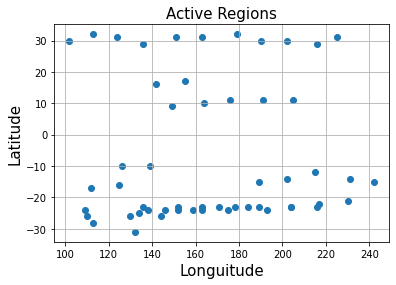

In [42]:
import matplotlib.pyplot as plt

plt.title("Active Regions", fontsize = 15)
plt.xlabel("Longuitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)

plt.scatter(sorted_Name.Longitude, sorted_Name.Latitude)
# plt.scatter(data.Latitude, data.Longitude)


# for i in range(0,52):
#     plt.scatter( sorted_Name.Longitude[i], sorted_Name.Latitude[i])
# plt.ylim(-90,90)
# plt.legend(loc= (1.5,0))
plt.grid()

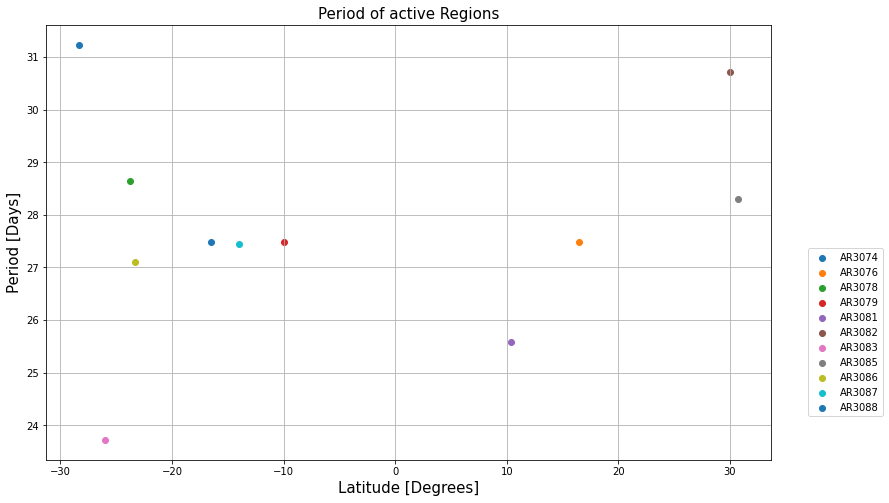

In [269]:
plt.figure(figsize=(13,8))

plt.title("Period of active Regions", fontsize = 15)
plt.xlabel("Latitude [Degrees]", fontsize = 15)
plt.ylabel("Period [Days]", fontsize = 15)

for i in range(0,11):
    plt.scatter( ar_summary['avr Lat'][i], ar_summary.Period[i], label =ar_summary.Name[i])
plt.legend(loc = (1.05,0.1))
plt.grid()



In [270]:
from scipy import optimize

def test_func(x, a, b):
    func = a + b*np.power(np.sin(x),2)# + c*np.power(np.sin(x),4)

    return func

x_data = np.linspace(-90,90,12) #ar_summary['avr Lat']
y_data = ar_summary['diff_Long']

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,0, p0=[2, 2,2])

print(params)

TypeError: curve_fit() got multiple values for argument 'p0'

In [271]:
import math

def objective(x,a,b,c):
    # func = a +b*np.power(math.sin(x),2) +c*np.power(math.sin(x),4)
    func = a*math.sin(x)
    test = a * x + b * x**2 + c


    return test


from scipy.optimize import curve_fit

x = np.arange(-90,90) #ar_summary['avr Lat']
y = ar_summary['diff_Long']


# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))
# plot input vs output
plt.scatter(x, y)
# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()



TypeError: only size-1 arrays can be converted to Python scalars

In [272]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

from math import sin
 
# define the true objective function
def objective(x, a, b, c):
	func = a + b*(sin(x))**2 + c*sin(x)**4

	return func	# ignore error
 
# load the dataset
# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
# dataframe = read_csv(url, header=None)
# data = dataframe.values
# choose the input and output variables
# x, y = data[:, 4], data[:, -1]

x = ar_summary['avr Lat']
y = ar_summary['diff_Long']

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c = popt.astype(float)
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

TypeError: cannot convert the series to <class 'float'>

## From the Report

Using a standard functional fit, we find co(0) = 2.902 — 0.464 sin2 ÿ — 0.328 sin4 cj) microrad s_1
, where 0 is the solar latitude

In [275]:
import math
import numpy as np

def omega(phi):
    # phi is the solar LATITUDE

    ans = (2.902 - .464*np.power(np.sin(phi),2) - 0.328*np.power(np.sin(phi),4)) #microrad/s
    return ans   #np.round(ans,10)


# omega(math.pi/3)
# math.sin(0)


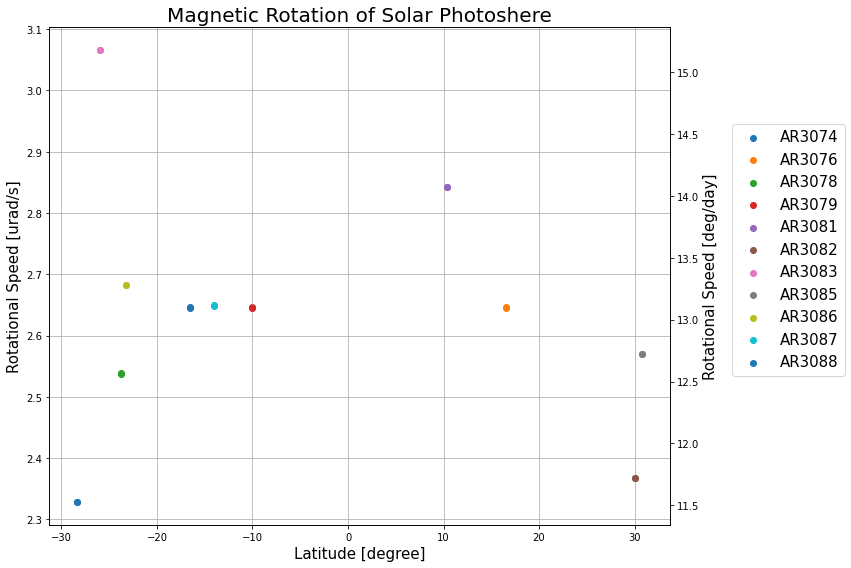

In [268]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,8))

x  = np.arange(-85,85,5)
# plt.figure(figsize=(13,8))

# rad = sorted_Name.Latitude


# color = 'tab:red'
plt.title('Magnetic Rotation of Solar Photoshere', fontsize = 20)
ax1.set_xlabel('Latitude [degree]', fontsize = 15)
ax1.set_ylabel('Rotational Speed [urad/s]', fontsize = 15)

# ax1.scatter(ar_summary['avr Lat'], ar_summary['speed [μrad\\s]'], label = 'Actual')
# ax1.scatter(ar_summary['avr Lat'], omega(np.deg2rad(ar_summary['avr Lat'].astype(float))), marker= 'o', label= 'Predicted')
# ax1.plot(x, omega(np.deg2rad(x)), color = 'green',label= 'SnodGrass')



# second Y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Rotational Speed [deg/day]', fontsize = 15)

for i in range(0,11):
    ax1.scatter(ar_summary['avr Lat'][i], ar_summary['speed [μrad\\s]'][i], label = ar_summary.Name[i])
    ax2.scatter(ar_summary['avr Lat'][i], ar_summary['speed[deg/day]'][i], label = ar_summary.Name[i] )



# plt.xlim(-30,-10)
plt.legend(loc = (1.1,0.3) , fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()




#### Original

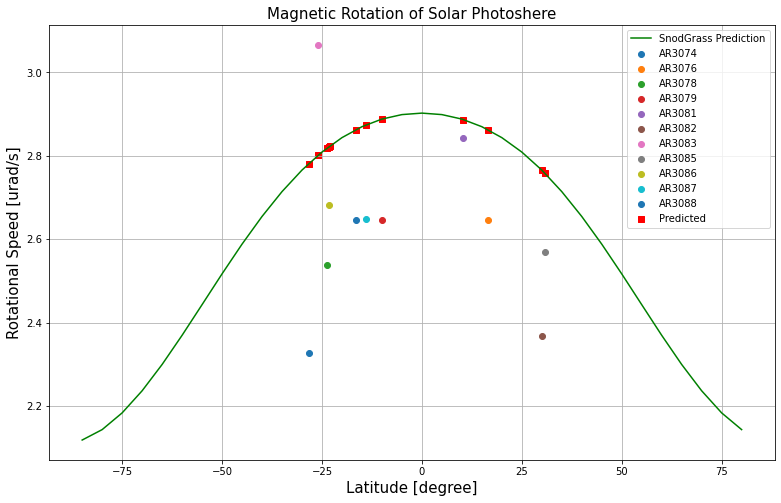

In [276]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(13,8))

x  = np.arange(-85,85,5)
# plt.figure(figsize=(13,8))

color = 'tab:red'
plt.title('Magnetic Rotation of Solar Photoshere', fontsize = 15)
ax1.set_xlabel('Latitude [degree]', fontsize = 15)
ax1.set_ylabel('Rotational Speed [urad/s]', fontsize = 15)

ax1.plot(x, omega(np.deg2rad(x)), color = 'green',label= 'SnodGrass Prediction')

# ax1.scatter(ar_summary['avr Lat'], ar_summary['speed [μrad\\s]'], label = 'Observations')
for i in range(0,11):
    ax1.scatter(ar_summary['avr Lat'][i], ar_summary['speed [μrad\\s]'][i], label = ar_summary.Name[i])
    # ax2.scatter(ar_summary['avr Lat'][i], ar_summary['speed[deg/day]'][i], label = ar_summary.Name[i])

ax1.scatter(ar_summary['avr Lat'], omega(np.deg2rad(ar_summary['avr Lat'].astype(float))), marker= 's',color='red', label= 'Predicted')

# ax1.tick_params(axis='y', labelcolor=color)



# ax2 = ax1.twinx()
# second Y-axis
# ax2.set_ylabel('Rotational Speed [deg/day]', fontsize = 15)
# ax2.scatter(ar_summary['avr Lat'], ar_summary['speed[deg/day]'], label = 'Actual', color = 'black')


ax1.legend( fontsize=10)
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()

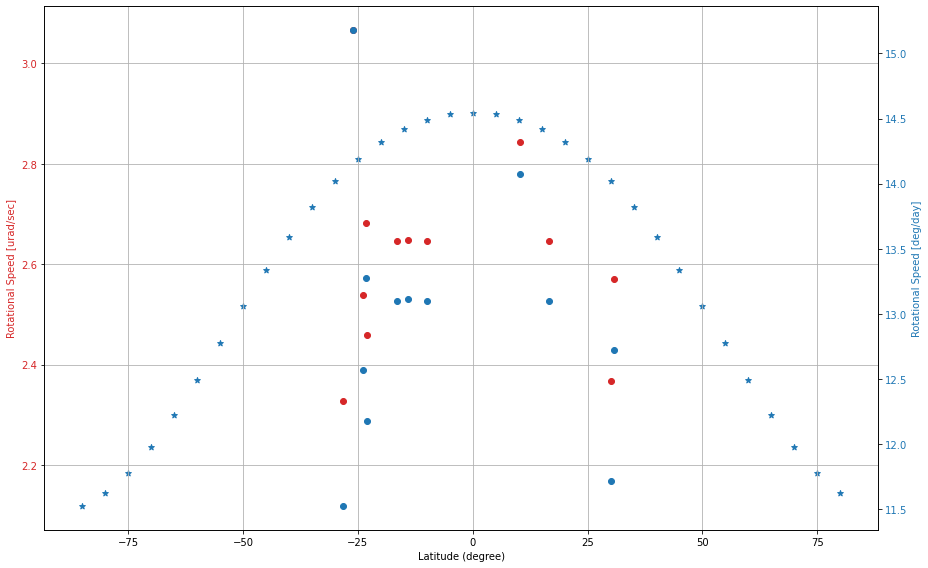

In [165]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(13,8))


color = 'tab:red'
ax1.set_xlabel('Latitude (degree)')
ax1.set_ylabel('Rotational Speed [urad/sec]', color=color)

ax1.scatter(x, omega(np.deg2rad(x)), marker= '*', label= 'Predicted')


ax1.scatter(ar_summary['avr Lat'], ar_summary['speed [μrad\\s]'], label = 'Actual', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Rotational Speed [deg/day]', color=color)  # we already handled the x-label with ax1
ax2.scatter(ar_summary['avr Lat'], ar_summary['speed[deg/day]'], label = 'Actual', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()
plt.show()